# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and test sets
* Fit a regression model to the dataset using the `statsmodels` library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Fix Column Names

In [3]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

### Inserts formatting created above

In [5]:
df.columns = [col_formatting(col) for col in df.columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)


In [8]:
train, test = train_test_split(df)

In [9]:
print(len(train),len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
10647,-0.504008,36.5878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8026,0.199786,60.9878,-0.063378,-0.306741,-0.045687,0.117830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1505,-0.502805,12.1878,-0.370585,-3.617843,-3.154699,-2.457318,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1648,1.097273,182.9878,0.411395,0.390333,0.576116,0.278777,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3869,0.151663,115.1520,0.160044,0.216064,0.161581,-0.525957,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
1766,-0.454683,12.1878,-0.342657,-4.140649,0.990651,0.439724,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4502,-0.467916,21.6000,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8049,2.358087,231.7878,2.087065,0.913138,0.783383,0.761617,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7618,-0.548522,42.6878,-0.370585,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3071,-0.483556,12.1380,-0.426440,-0.655279,-1.082024,-0.365010,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
outcome

'list_price'

In [11]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     520.7
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:23:14   Log-Likelihood:                -40745.
No. Observations:                8152   AIC:                         8.168e+04
Df Residuals:                    8057   BIC:                         8.235e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.1851      1.921     33.414      0.000      60.420      67.951
piece_count                                         73.5357      0.934     78.706      0.000      71.704      75.367
num_reviews                                          5.7679      0.707      8.155      0.000       4.382       7.154
play_star_rating                                     5.3996      0.646      8.357      0.000       4.133       6.666
star_rating                                         -1.8915      0.736     -2.572      0.010      -3.333      -0.450
val_star_rating                                     -8.8971      0.655    -13.575      0.000     -10.182      -7.612
ages_10plus                                        123.9670      6.929     17.892      0.000     110.385     137.549
ages_10_14                                         -26.4968      9.166     -2.891      0.004     -44.465      -8.528
ages_10_16                                         -10.0349      4.182     -2.400      0.016     -18.232      -1.838
ages_10_21                                          51.7616      7.602      6.809      0.000      36.859      66.664
ages_11_16                                         -12.9636      5.901     -2.197      0.028     -24.531      -1.397
ages_12plus                                         72.7155      5.844     12.443      0.000      61.260      84.171
ages_12_16                                         -49.1215      6.901     -7.118      0.000     -62.648     -35.594
ages_14plus                                         31.0928      4.271      7.280      0.000      22.721      39.465
ages_16plus                                         33.5208      6.128      5.470      0.000      21.508      45.534
ages_1half_3                                        -9.8858      2.497     -3.959      0.000     -14.781      -4.991
ages_1half_5                                        -4.1975      3.153     -1.331      0.183     -10.377       1.982
ages_2_5                                            14.8610      1.737      8.554      0.000      11.455      18.267
ages_4plus                                         -17.6018      6.875     -2.560      0.010     -31.079      -4.125
ages_4_7                                            -5.6326      3.616     -1.558      0.119     -12.720       1.455
ages_4_99                                           -4.4380      3.890     -1.141      0.254     -12.064       3.188
ages_5plus                                         -10.0534      3.182     -3.160      0.002     -16.290      -3.817
ages_5_12                                          -36.3388      3.228    -11.257      0.000     -42.667     -30.011
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [21]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < .05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

In [53]:
p_table.head()

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.1851,1.921,33.414,0.00,60.420,67.951
piece_count,73.5357,0.934,78.706,0.00,71.704,75.367
num_reviews,5.7679,0.707,8.155,0.00,4.382,7.154
play_star_rating,5.3996,0.646,8.357,0.00,4.133,6.666
star_rating,-1.8915,0.736,-2.572,0.01,-3.333,-0.450


In [54]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     718.9
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:41:16   Log-Likelihood:                -40761.
No. Observations:                8152   AIC:                         8.166e+04
Df Residuals:                    8083   BIC:                         8.214e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.7532      1.557     40.297      0.000      59.701      65.806
piece_count                                         73.9387      0.911     81.130      0.000      72.152      75.725
num_reviews                                          5.6418      0.687      8.209      0.000       4.295       6.989
play_star_rating                                     5.4940      0.629      8.730      0.000       4.260       6.728
star_rating                                         -1.8677      0.719     -2.598      0.009      -3.277      -0.459
val_star_rating                                     -8.7912      0.621    -14.154      0.000     -10.009      -7.574
ages_10plus                                        118.8653      5.069     23.448      0.000     108.928     128.802
ages_10_14                                         -20.2457      9.529     -2.125      0.034     -38.925      -1.566
ages_10_16                                          -4.6802      4.015     -1.166      0.244     -12.551       3.190
ages_10_21                                          43.6329      3.243     13.455      0.000      37.276      49.990
ages_11_16                                          -8.0606      5.714     -1.411      0.158     -19.262       3.140
ages_12plus                                         71.7076      6.239     11.493      0.000      59.477      83.938
ages_12_16                                         -43.8905      7.264     -6.042      0.000     -58.129     -29.652
ages_14plus                                         36.9600      4.689      7.882      0.000      27.768      46.152
ages_16plus                                         37.0077      6.823      5.424      0.000      23.632      50.383
ages_1half_3                                        -2.8853      3.188     -0.905      0.365      -9.134       3.364
ages_2_5                                            21.7159      2.008     10.815      0.000      17.780      25.652
ages_4plus                                         -13.4586     10.497     -1.282      0.200     -34.035       7.118
ages_5plus                                          -7.7192      3.127     -2.468      0.014     -13.849      -1.589
ages_5_12                                          -30.1330      2.749    -10.960      0.000     -35.523     -24.743
ages_6plus                                         -21.8289      5.508     -3.963      0.000     -32.626     -11.032
ages_6_12                                          -16.5521      1.898     -8.720      0.000     -20.273     -12.831
ages_7_12                                          -14.8693      2.239     -6.641      0.000     -19.258     -10.480
ages_7_14                                

In [55]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

70 59
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,62.7532,1.557,40.297,0.000,59.701,65.806
piece_count,73.9387,0.911,81.130,0.000,72.152,75.725
num_reviews,5.6418,0.687,8.209,0.000,4.295,6.989
play_star_rating,5.4940,0.629,8.730,0.000,4.260,6.728
star_rating,-1.8677,0.719,-2.598,0.009,-3.277,-0.459


In [56]:
x_cols

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_21',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_2_5',
 'ages_5plus',
 'ages_5_12',
 'ages_6plus',
 'ages_6_12',
 'ages_7_12',
 'ages_7_14',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DIMENSIONS',
 'theme_name_Dilophosaurus_Outpost_Attack',
 'theme_name_Disney',
 'theme_name_Ghostbusters',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Marvel_Super_Heroes',
 'theme_name_Minifigures',
 'theme_name_NINJAGO',
 'theme_name_SERIOUS_PLAY',
 'theme_name_Star_Wars',
 'theme_name_T_rex_Transport',
 'theme_name

In [58]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     841.8
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:43:27   Log-Likelihood:                -40770.
No. Observations:                8152   AIC:                         8.166e+04
Df Residuals:                    8093   BIC:                         8.207e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.4100      1.188     51.696      0.000      59.081      63.739
piece_count                                         73.2926      0.828     88.501      0.000      71.669      74.916
num_reviews                                          5.3227      0.650      8.193      0.000       4.049       6.596
play_star_rating                                     5.6020      0.621      9.016      0.000       4.384       6.820
star_rating                                         -1.8565      0.714     -2.601      0.009      -3.256      -0.457
val_star_rating                                     -8.8667      0.618    -14.351      0.000     -10.078      -7.656
ages_10plus                                        121.0303      4.945     24.476      0.000     111.337     130.724
ages_10_14                                         -16.9107      9.348     -1.809      0.070     -35.235       1.413
ages_10_21                                          45.3689      3.144     14.431      0.000      39.206      51.532
ages_12plus                                         74.6502      5.915     12.621      0.000      63.056      86.245
ages_12_16                                         -38.7767      6.892     -5.627      0.000     -52.286     -25.267
ages_14plus                                         42.2724      4.076     10.370      0.000      34.282      50.263
ages_16plus                                         44.0565      6.016      7.324      0.000      32.265      55.848
ages_2_5                                            23.5575      1.824     12.914      0.000      19.981      27.133
ages_5plus                                          -6.8243      3.103     -2.199      0.028     -12.907      -0.742
ages_5_12                                          -28.1400      2.623    -10.727      0.000     -33.282     -22.998
ages_6plus                                         -19.6136      5.436     -3.608      0.000     -30.270      -8.957
ages_6_12                                          -13.9325      1.585     -8.789      0.000     -17.040     -10.825
ages_7_12                                          -12.5031      1.975     -6.332      0.000     -16.374      -8.633
ages_7_14                                          -10.3013      1.729     -5.957      0.000     -13.691      -6.912
ages_8_12                                          -11.7051      2.539     -4.611      0.000     -16.682      -6.729
ages_8_14                                           -7.7048      1.698     -4.537      0.000     -11.034      -4.376
ages_9plus                                         100.4789     11.047      9.095      0.000      78.823     122.135
ages_9_12                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [59]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

60 58
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,61.4100,1.188,51.696,0.000,59.081,63.739
piece_count,73.2926,0.828,88.501,0.000,71.669,74.916
num_reviews,5.3227,0.650,8.193,0.000,4.049,6.596
play_star_rating,5.6020,0.621,9.016,0.000,4.384,6.820
star_rating,-1.8565,0.714,-2.601,0.009,-3.256,-0.457


In [60]:
x_cols

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_21',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_2_5',
 'ages_5plus',
 'ages_5_12',
 'ages_6plus',
 'ages_6_12',
 'ages_7_12',
 'ages_7_14',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DIMENSIONS',
 'theme_name_Dilophosaurus_Outpost_Attack',
 'theme_name_Disney',
 'theme_name_Ghostbusters',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Marvel_Super_Heroes',
 'theme_name_Minifigures',
 'theme_name_NINJAGO',
 'theme_name_SERIOUS_PLAY',
 'theme_name_Star_Wars',
 'theme_name_T_rex_Transport',
 'theme_name_THE_LEGO_BATMA

In [61]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     856.3
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:45:06   Log-Likelihood:                -40771.
No. Observations:                8152   AIC:                         8.166e+04
Df Residuals:                    8094   BIC:                         8.207e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           61.4241      1.188     51.701      0.000      59.095      63.753
piece_count                                         73.4164      0.825     88.942      0.000      71.798      75.034
num_reviews                                          5.3797      0.649      8.289      0.000       4.107       6.652
play_star_rating                                     5.6243      0.621      9.052      0.000       4.406       6.842
star_rating                                         -1.8616      0.714     -2.608      0.009      -3.261      -0.462
val_star_rating                                     -8.8987      0.618    -14.407      0.000     -10.109      -7.688
ages_10plus                                        121.4799      4.939     24.594      0.000     111.798     131.162
ages_10_21                                          45.4493      3.144     14.456      0.000      39.286      51.612
ages_12plus                                         74.8237      5.915     12.650      0.000      63.229      86.418
ages_12_16                                         -38.6828      6.892     -5.612      0.000     -52.194     -25.172
ages_14plus                                         42.6326      4.072     10.469      0.000      34.650      50.615
ages_16plus                                         44.1891      6.016      7.345      0.000      32.396      55.982
ages_2_5                                            23.6490      1.824     12.967      0.000      20.074      27.224
ages_5plus                                          -6.7951      3.103     -2.190      0.029     -12.878      -0.712
ages_5_12                                          -27.9474      2.622    -10.661      0.000     -33.086     -22.808
ages_6plus                                         -19.4294      5.436     -3.574      0.000     -30.085      -8.773
ages_6_12                                          -13.7091      1.581     -8.673      0.000     -16.808     -10.611
ages_7_12                                          -12.2911      1.971     -6.235      0.000     -16.155      -8.427
ages_7_14                                          -10.1557      1.728     -5.878      0.000     -13.542      -6.769
ages_8_12                                          -11.5790      2.538     -4.562      0.000     -16.554      -6.604
ages_8_14                                           -7.4132      1.691     -4.385      0.000     -10.727      -4.099
ages_9plus                                         100.7696     11.048      9.121      0.000      79.113     122.426
ages_9_12                                          -20.1562      6.487     -3.107      0.002     -32.872      -7.441
theme_name_Architecture                  

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [65]:
df[x_cols]

,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_21,ages_12plus,ages_12_16,ages_14plus,...,country_DN,country_FI,country_LU,country_NL,country_NO,country_NZ,country_PL,country_US,review_difficulty_Average,review_difficulty_Challenging
0,-0.273020,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.404154,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.517242,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.635296,0.187972,-1.352353,0.161581,0.117830,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.288812,-0.063378,-2.049427,0.161581,-0.204063,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
5,0.111962,-0.258873,-1.178084,0.783383,0.278777,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0.113165,0.578962,-1.178084,-0.667489,-0.204063,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0.332123,0.215900,0.041796,0.368848,0.117830,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
8,-0.043234,0.187972,-1.352353,0.368848,-0.204063,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,-0.072108,-0.147162,-1.352353,0.576116,0.439724,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [66]:
variance_inflation_factor

<function statsmodels.stats.outliers_influence.variance_inflation_factor(exog, exog_idx)>

In [62]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/opt/conda/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.025964335219288),
 ('num_reviews', 2.4680932496452352),
 ('play_star_rating', 2.3799802158019063),
 ('star_rating', 3.1494450919532224),
 ('val_star_rating', 2.359681103729003),
 ('ages_10plus', 6.9953072855327605),
 ('ages_10_21', 1.051638755976771),
 ('ages_12plus', 5.585743910295428),
 ('ages_12_16', 1.1452993378806489),
 ('ages_14plus', 1.6687265783531282),
 ('ages_16plus', 8.202619666787182),
 ('ages_2_5', 1.1859391050144572),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1954539567759612),
 ('ages_6plus', 2.6614776427511333),
 ('ages_6_12', 1.736415351019647),
 ('ages_7_12', 1.4059281047478995),
 ('ages_7_14', 1.7834928303747013),
 ('ages_8_12', 1.211616233163503),
 ('ages_8_14', 1.5835663253625607),
 ('ages_9plus', 1.3972373131663611),
 ('ages_9_12', 1.0167398505153742),
 ('theme_name_Architecture', 4.92394393011518),
 ('theme_name_BOOST', 1.0636224225545046),
 ('theme_name_Blues_Helicopter_Pursuit', 1.0395325652546124),
 ('theme_name_BrickHeadz', 6.797135348094826),

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [67]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

58 52


In [68]:
x_cols

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10_21',
 'ages_12_16',
 'ages_14plus',
 'ages_2_5',
 'ages_5_12',
 'ages_6plus',
 'ages_6_12',
 'ages_7_12',
 'ages_7_14',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DIMENSIONS',
 'theme_name_Dilophosaurus_Outpost_Attack',
 'theme_name_Disney',
 'theme_name_Ghostbusters',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Marvel_Super_Heroes',
 'theme_name_NINJAGO',
 'theme_name_SERIOUS_PLAY',
 'theme_name_Star_Wars',
 'theme_name_T_rex_Transport',
 'theme_name_THE_LEGO_BATMAN_MOVIE',
 'theme_name_THE_LEGO_NINJAGO_MOVIE',
 'country_BE',
 'country_CA',
 'country_CZ',
 'country_DN',
 'countr

In [69]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula= outcome + '~' + predictors
model = ols(formula= formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     853.9
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:22:58   Log-Likelihood:                -41102.
No. Observations:                8152   AIC:                         8.231e+04
Df Residuals:                    8099   BIC:                         8.268e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.9936      1.107     57.815      0.000      61.824      66.163
piece_count                                         75.6547      0.702    107.822      0.000      74.279      77.030
num_reviews                                          4.7555      0.635      7.486      0.000       3.510       6.001
play_star_rating                                     6.2130      0.581     10.701      0.000       5.075       7.351
star_rating                                         -1.8799      0.724     -2.596      0.009      -3.300      -0.460
val_star_rating                                    -10.1646      0.638    -15.928      0.000     -11.416      -8.914
ages_10_21                                          43.5097      3.241     13.427      0.000      37.157      49.862
ages_12_16                                         -51.1826      6.981     -7.332      0.000     -64.867     -37.498
ages_14plus                                         22.7872      3.795      6.004      0.000      15.348      30.226
ages_2_5                                            22.1035      1.828     12.095      0.000      18.521      25.686
ages_5_12                                          -29.8892      2.691    -11.109      0.000     -35.163     -24.615
ages_6plus                                         -22.7505      5.635     -4.038      0.000     -33.796     -11.705
ages_6_12                                          -16.9771      1.596    -10.636      0.000     -20.106     -13.848
ages_7_12                                          -14.8504      2.020     -7.351      0.000     -18.810     -10.890
ages_7_14                                          -12.4097      1.759     -7.055      0.000     -15.858      -8.961
ages_8_12                                          -15.1998      2.595     -5.858      0.000     -20.287     -10.113
ages_8_14                                          -11.0648      1.734     -6.382      0.000     -14.463      -7.666
ages_9plus                                          17.2862     10.834      1.596      0.111      -3.951      38.523
ages_9_12                                          -25.0710      6.740     -3.720      0.000     -38.282     -11.860
theme_name_Architecture                            -14.8559      3.265     -4.550      0.000     -21.256      -8.456
theme_name_BOOST                                    84.2899     10.343      8.150      0.000      64.015     104.565
theme_name_Blues_Helicopter_Pursuit                 23.5534      9.308      2.531      0.011       5.308      41.799
theme_name_Carnotaurus_Gyrosphere_Escape            49.4819     10.622      4.659      0.000      28.660      70.303
theme_name_City                          

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [70]:
# Your code here - Check that the residuals are normally distributed
import statsmodels.api as sm
import scipy.stats as stats

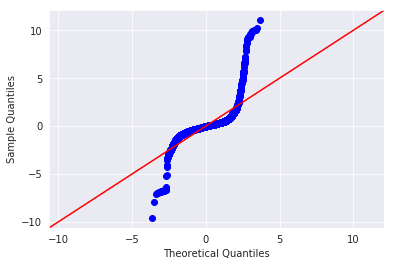

In [71]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line = '45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

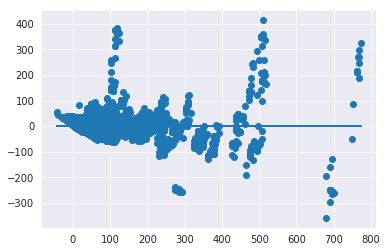

In [76]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

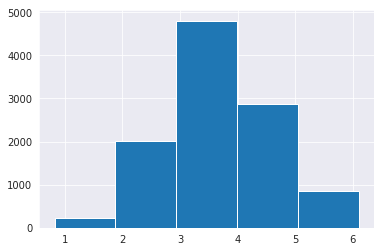

In [85]:
# Your code here - Check for outliers
df.list_price.hist(bins=5)

In [78]:
# Your code here
# Remove extreme outliers
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

# Rerun the model

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [79]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     469.5
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:34:34   Log-Likelihood:                -5005.6
No. Observations:                8067   AIC:                         1.012e+04
Df Residuals:                    8014   BIC:                         1.049e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4367      0.013    256.987      0.000       3.410       3.463
piece_count                                          0.6450      0.010     65.903      0.000       0.626       0.664
num_reviews                                         -0.0275      0.008     -3.475      0.001      -0.043      -0.012
play_star_rating                                     0.1430      0.007     20.775      0.000       0.130       0.157
star_rating                                         -0.0706      0.009     -8.101      0.000      -0.088      -0.053
val_star_rating                                     -0.1256      0.008    -16.205      0.000      -0.141      -0.110
ages_10_21                                           0.6411      0.040     16.163      0.000       0.563       0.719
ages_12_16                                          -0.3008      0.085     -3.531      0.000      -0.468      -0.134
ages_14plus                                          0.2869      0.049      5.889      0.000       0.191       0.382
ages_2_5                                             0.4470      0.022     20.248      0.000       0.404       0.490
ages_5_12                                           -0.8232      0.033    -25.254      0.000      -0.887      -0.759
ages_6plus                                          -0.9590      0.072    -13.394      0.000      -1.099      -0.819
ages_6_12                                           -0.2479      0.019    -12.835      0.000      -0.286      -0.210
ages_7_12                                            0.0036      0.025      0.146      0.884      -0.045       0.052
ages_7_14                                           -0.0978      0.021     -4.607      0.000      -0.139      -0.056
ages_8_12                                            0.1605      0.031      5.121      0.000       0.099       0.222
ages_8_14                                            0.1706      0.021      8.157      0.000       0.130       0.212
ages_9plus                                           0.0950      0.125      0.758      0.449      -0.151       0.341
ages_9_12                                            0.2991      0.079      3.803      0.000       0.145       0.453
theme_name_Architecture                              0.3687      0.039      9.431      0.000       0.292       0.445
theme_name_BOOST                                     0.9778      0.129      7.585      0.000       0.725       1.231
theme_name_Blues_Helicopter_Pursuit                  0.7496      0.115      6.505      0.000       0.524       0.976
theme_name_Carnotaurus_Gyrosphere_Escape             1.1740      0.133      8.843      0.000       0.914       1.434
theme_name_City                          

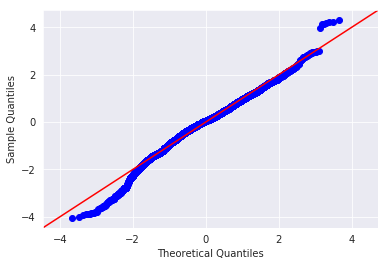

In [86]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line ='45', fit=True)

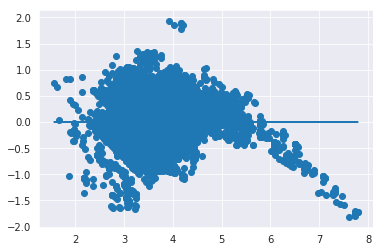

In [87]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [88]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print('percentile: {}, price: {}'.format(q, df.list_price.quantile(q=q)))
    

percentile: 0.8, price: 4.447203233446613
percentile: 0.81, price: 4.512971560274537
percentile: 0.82, price: 4.542526402035123
percentile: 0.83, price: 4.580752485605895
percentile: 0.84, price: 4.640913706863106
percentile: 0.85, price: 4.6985494117910225
percentile: 0.86, price: 4.718373863481943
percentile: 0.87, price: 4.787408405976297
percentile: 0.88, price: 4.8039210397329235
percentile: 0.89, price: 4.826327766567244
percentile: 0.9, price: 4.89924031131419
percentile: 0.91, price: 4.976713742220571
percentile: 0.92, price: 5.0490223265009595
percentile: 0.93, price: 5.140421850231899
percentile: 0.94, price: 5.209419483952433
percentile: 0.95, price: 5.292263579298989
percentile: 0.96, price: 5.391752152536553
percentile: 0.97, price: 5.528952783620542
percentile: 0.98, price: 5.678340376637527
percentile: 0.99, price: 5.873347331375852


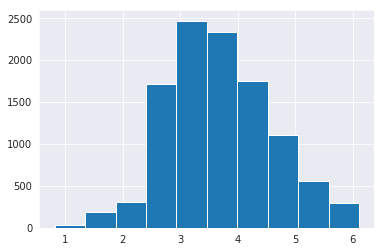

In [89]:
df.list_price.hist()

### Histogram tells us that we might be able to get more accurrate if we only look at data below or equal to 6

In [90]:
df = df[df.list_price <=6]
train, test = train_test_split(df)


In [91]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     466.2
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:49:34   Log-Likelihood:                -4888.6
No. Observations:                8027   AIC:                             9883.
Df Residuals:                    7974   BIC:                         1.025e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4397      0.013    257.389      0.000       3.413       3.466
piece_count                                          0.6815      0.010     66.069      0.000       0.661       0.702
num_reviews                                         -0.0278      0.008     -3.631      0.000      -0.043      -0.013
play_star_rating                                     0.1415      0.007     20.681      0.000       0.128       0.155
star_rating                                         -0.0658      0.009     -7.658      0.000      -0.083      -0.049
val_star_rating                                     -0.1211      0.008    -15.794      0.000      -0.136      -0.106
ages_10_21                                           0.6745      0.039     17.224      0.000       0.598       0.751
ages_12_16                                          -0.3718      0.082     -4.561      0.000      -0.532      -0.212
ages_14plus                                          0.2385      0.049      4.876      0.000       0.143       0.334
ages_2_5                                             0.4842      0.022     21.566      0.000       0.440       0.528
ages_5_12                                           -0.7687      0.032    -24.120      0.000      -0.831      -0.706
ages_6plus                                          -0.9789      0.069    -14.138      0.000      -1.115      -0.843
ages_6_12                                           -0.2452      0.019    -12.831      0.000      -0.283      -0.208
ages_7_12                                            0.0217      0.024      0.905      0.366      -0.025       0.069
ages_7_14                                           -0.0962      0.021     -4.635      0.000      -0.137      -0.056
ages_8_12                                            0.1877      0.031      6.016      0.000       0.127       0.249
ages_8_14                                            0.1845      0.021      8.926      0.000       0.144       0.225
ages_9plus                                           0.1325      0.122      1.086      0.277      -0.107       0.372
ages_9_12                                            0.3111      0.074      4.214      0.000       0.166       0.456
theme_name_Architecture                              0.3908      0.039     10.057      0.000       0.315       0.467
theme_name_BOOST                                     0.9709      0.123      7.895      0.000       0.730       1.212
theme_name_Blues_Helicopter_Pursuit                  0.7161      0.114      6.290      0.000       0.493       0.939
theme_name_Carnotaurus_Gyrosphere_Escape             1.1309      0.105     10.740      0.000       0.925       1.337
theme_name_City                          

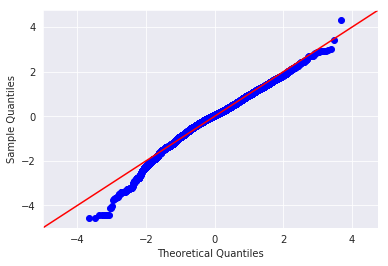

In [92]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

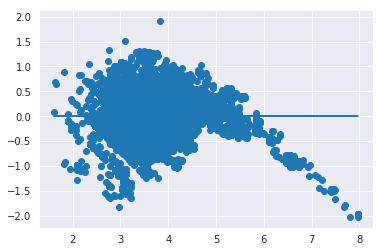

In [93]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 